In [148]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.datasets import load_digits
from scipy.stats import mode

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn import random_projection
#https://scikit-learn.org/stable/modules/decomposition.html#decompositions
#NMF Non-negative factorization (NMF)

import seaborn as sns
import matplotlib.pyplot as plt
import sys

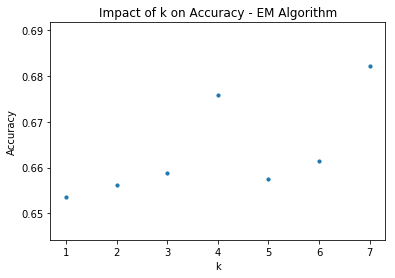

In [197]:
accuracy_list = []
x_axis = []
for i in range(2,9):
    k_value = i
    
    #Data
    '''
    cluster_size = i #10
    digits = load_digits()
    X = digits.data
    y = digits.target
    '''

    data_location = './pima-indians-diabetes.data'
    header = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 
            'insulin', 'bmi', 'diabetepedigree', 'age', 'outcome']

    df = pd.read_csv(data_location, names=header)

    X = np.array(df.drop(['outcome'], 1).astype(float))
    y = np.array(df['outcome'])
    
    #Feature transformation
    nmf = NMF(n_components=k_value)
    X = nmf.fit_transform(X)

    
    
    #clustering algorithm
    
    
    kmeans = KMeans(init='k-means++', n_clusters=k_value, random_state=0)
    clusters = kmeans.fit_predict(X)
    '''
    gmm = GaussianMixture(n_components=k_value,
                                covariance_type='full',
                                max_iter=1000,
                                n_init=1).fit(X)

    clusters = gmm.fit_predict(X)
    '''
    predict_y = np.zeros_like(clusters)
    for i in range(k_value):
        mask = (clusters == i)
        predict_y[mask] = mode(y[mask])[0]

    #graphing
    x_axis.append(i)
    accuracy_list.append(accuracy_score(y, predict_y))

plt.scatter(x_axis, accuracy_list, s=10)
plt.title('Impact of k on Accuracy - EM Algorithm')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [193]:
print(accuracy_list)

[0.7200520833333334, 0.7122395833333334, 0.6705729166666666, 0.6575520833333334, 0.6549479166666666, 0.6510416666666666, 0.6666666666666666, 0.68359375, 0.7005208333333334]


###### 

ValueError: shapes (11,11) and (64,) not aligned: 11 (dim 1) != 64 (dim 0)